### Documentation
-----------------

- The setup requires that the use must have R downloaded 
- They must also have packages gtools, splines2, pracma, RSpectra installed in the R environment (this can be included in the install_fdascc func)
- run the set_r_home function by specifying the location where R is installed to set the r_home environ variable for rpy2 to use
- have the FDASCC folder saved on their machine
- run the install_fdascc function with the location of the FDASCC folder to download the R code as a package

In [1]:
import rpy2
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

from FDASCC_py.fdascc import check_fdascc_install, list_available_fdascc_methods, scc_1D_one_sample, scc_1D_two_sample

Unable to determine R home: [WinError 2] The system cannot find the file specified
Unable to determine R library path: Command '('C:\\Users\\alley\\AppData\\Local\\R-3.6.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


r_home environment variable set to C:/Users/alley/AppData/Local/R-3.6.3
FDASCC Installed


In [2]:
check_fdascc_install()
list_available_fdascc_methods()

FDASCC Installed: True
['cov1g_sce', 'cov2g_sce', 'fit_cov_1D', 'fit_func_1D', 'fit_mean_1D', 'plot_func', 'scc_1D', 'scc1g_1D', 'scc2g_1D']


## Run examples from example.R

### Example 1

In [3]:
n = 50
N = 100
X = np.arange(1/N, 1.01, 1/N)
X_band = np.arange(1/(N-1), 1.01, 1/(N-1))
Y = np.zeros((n, N))
mu_true = 5*X + 4*np.sin(2*np.pi*(X-0.5))  
psi1 = -np.sqrt(2)*np.cos(2*np.pi*(X-0.5))
psi2 = np.sqrt(2)*np.cos(2*np.pi*(X-0.5))
sig = 0.1
lam1 = 2
lam2 = 1
xi1 = np.random.normal(0, np.sqrt(lam1), n)
xi2 = np.random.normal(0, np.sqrt(lam2), n)
for i in range(1, n):
    Y[i, ] = mu_true + xi1[i]*psi1 + xi2[i]*psi2 + (np.random.normal(0, sig, N))

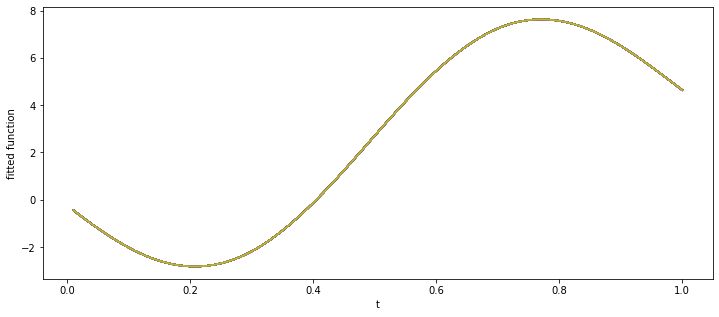

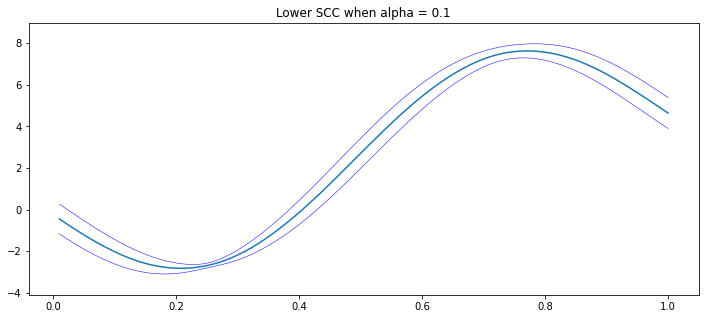

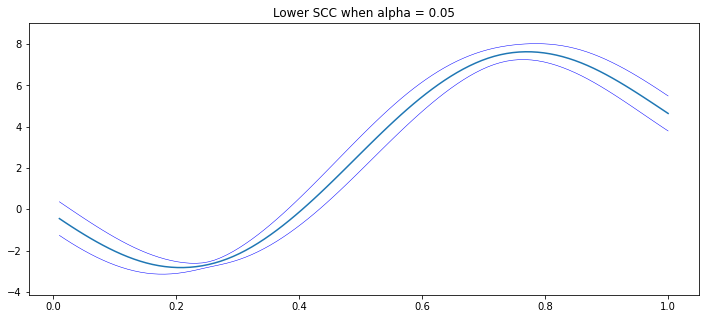

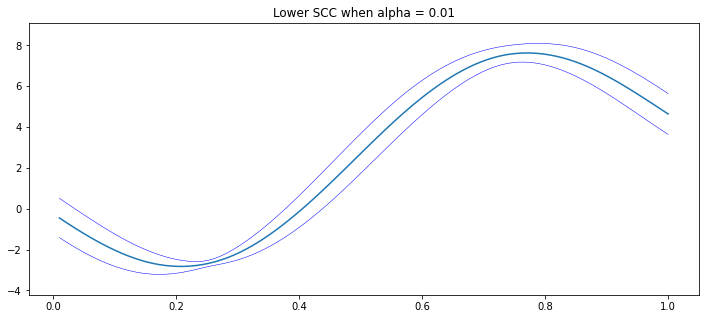

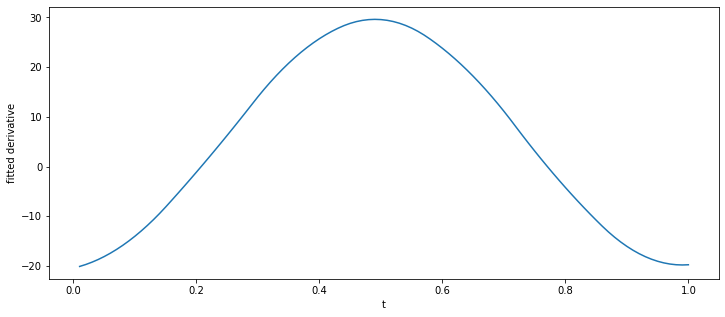

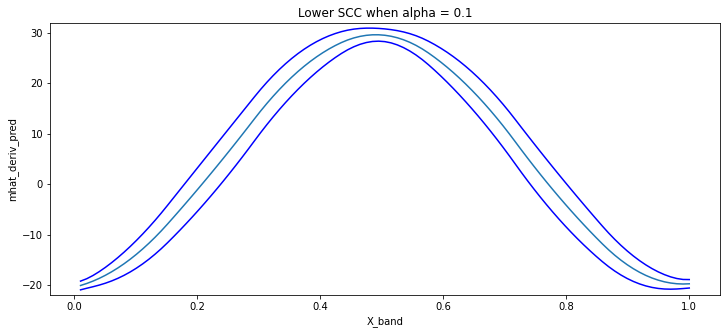

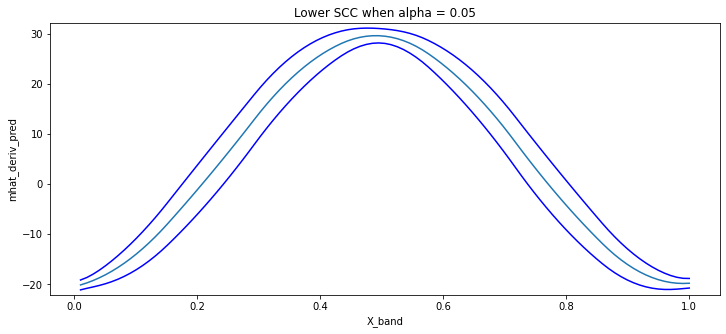

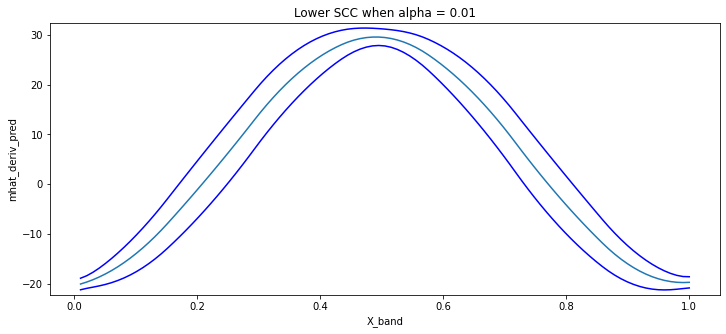

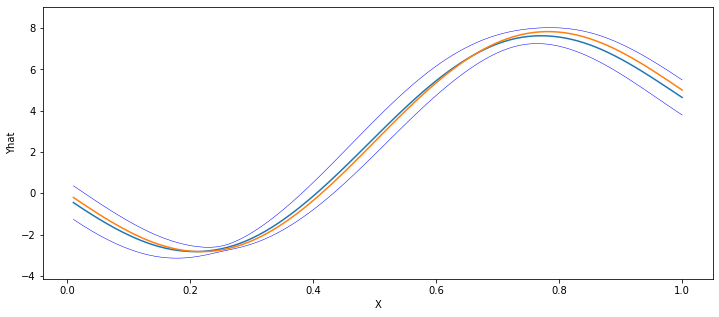

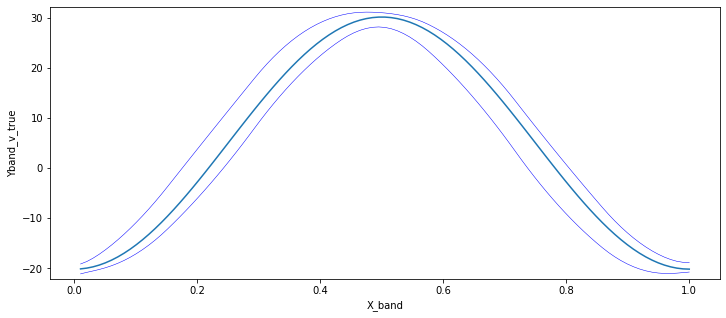

In [4]:
# fdascc.plot_func(out)
(Yhat, Yhat_pred, Yhat_deriv, Yhat_deriv_pred, scc, scc_deriv, sce, bw, bw_deriv, Ya, d_est, d_cov, derivs, alpha) = scc_1D_one_sample(Y,
                                                                                                                            X,
                                                                                                                            X_band,
                                                                                                                            generate_plots=True)
# generate plots for actual values
Yband_true = 5*X_band + 4*np.sin(2*np.pi*(X_band-0.5))
Yband_v_true = 5 + 8*np.pi*np.cos(2*np.pi*(X_band - 0.5))

plt.plot(X, Yhat[0])
plt.ylim(min(scc[:,0,1])-1, max(scc[:,1,1])+1)
plt.plot(X_band, Yband_true)
plt.plot(X_band, scc[:,0,1], color='blue', linewidth=0.5)
plt.plot(X_band, scc[:,1,1], color='blue', linewidth=0.5)
plt.ylabel('Yhat')
plt.xlabel('X')
plt.show()

plt.plot(X_band, Yband_v_true)
plt.ylim(min(scc_deriv[:,0,1])-1, max(scc_deriv[:,1,1])+1)
plt.plot(X_band, scc_deriv[:,0,1], color='blue', linewidth=0.5)
plt.plot(X_band, scc_deriv[:,1,1], color='blue', linewidth=0.5)
plt.ylabel('Yband_v_true')
plt.xlabel('X_band')
plt.show()

### Example 2

In [5]:
n = 100
N = 2*(n**(1/4))*np.log(n)
X = np.arange(1/N, 1.01, 1/N)
X_band = np.round(np.arange(0.01, 1.01, 0.01),3)
mu1_true = 10 + np.sin(2*np.pi*(X-1/2))  
psi1 = -np.sqrt(2)*np.cos(np.pi*(X-1/2))
psi2 = np.sqrt(2)*np.sin(np.pi*(X-1/2))
lam1 = 2
lam2 = 0.5
sig = 0.3
xi1 = np.random.normal(0, np.sqrt(lam1), n)
xi2 = np.random.normal(0, np.sqrt(lam2), n)
Y = np.zeros((n, int(N)))
for i in range(0, n):
    Y[i, ] = mu1_true + xi1[i]*psi1 + xi2[i]*psi2 + (np.random.normal(0, sig, int(N)))

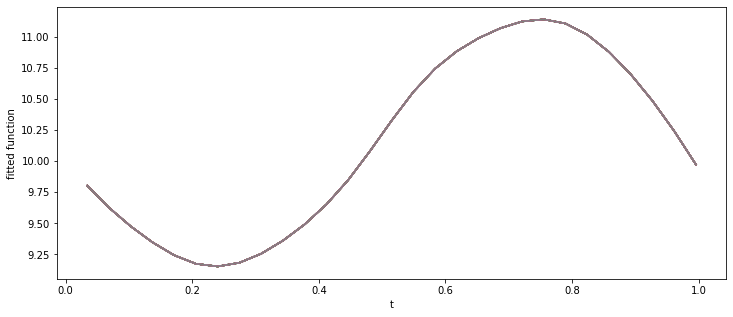

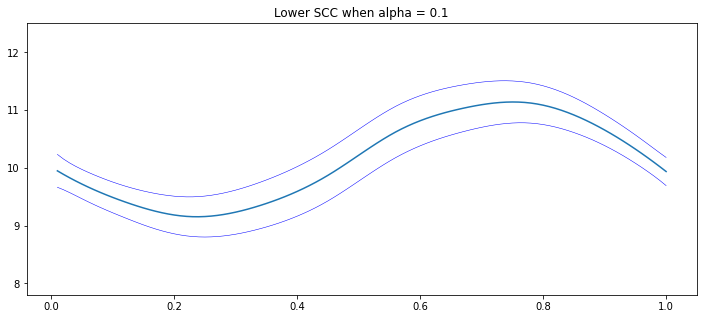

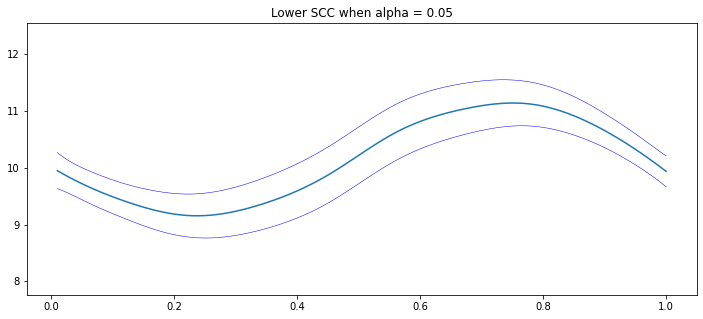

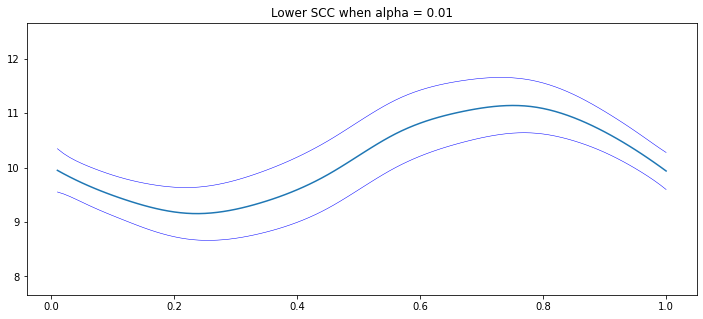

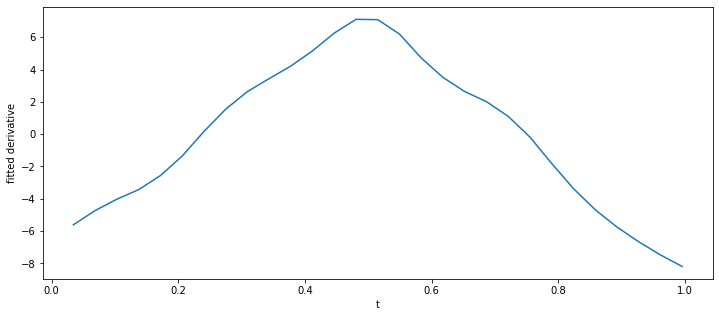

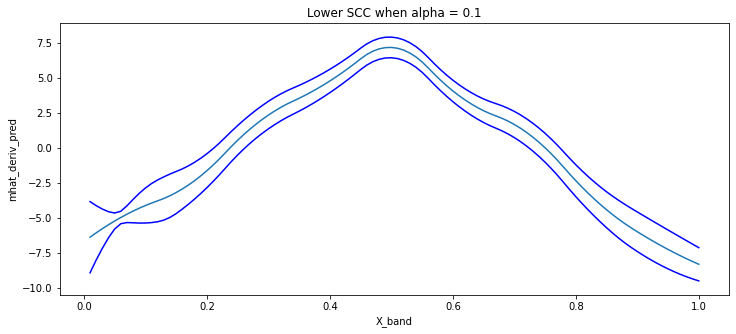

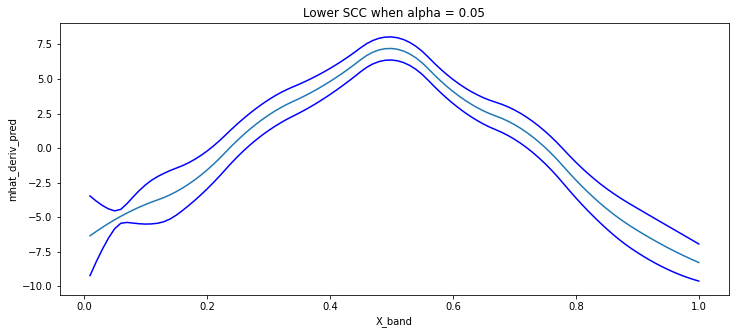

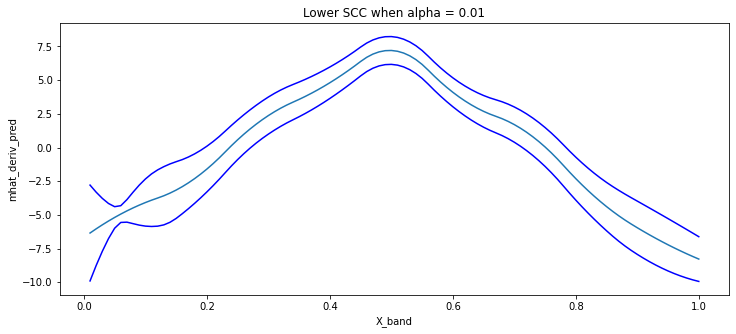

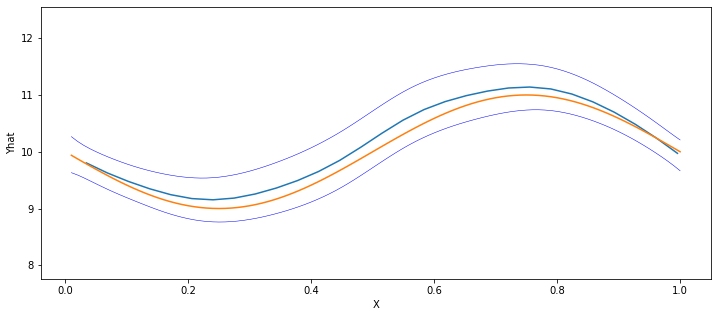

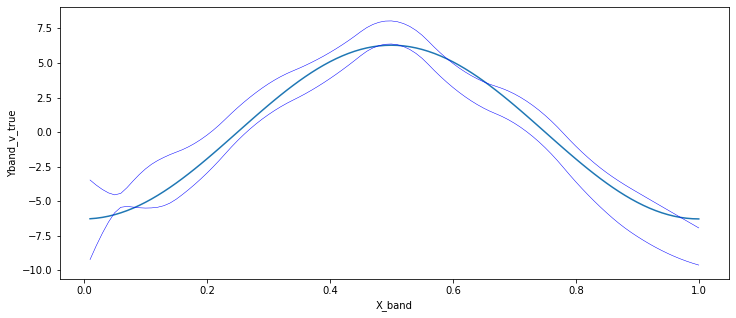

In [6]:
#example2 method results
(Yhat, Yhat_pred, Yhat_deriv, Yhat_deriv_pred, scc, scc_deriv, sce, bw, bw_deriv, Ya, d_est, d_cov, derivs, alpha) = scc_1D_one_sample(Y, 
                                                                                                                                       X, 
                                                                                                                                       X_band, 
                                                                                                                                       generate_plots=True)

# generate plots for actual values
Yband_true = 10 + np.sin(2*np.pi*(X_band-1/2))
Yband_v_true = 2*np.pi*np.cos(2*np.pi*(X_band-1/2))

plt.plot(X, Yhat[0])
plt.ylim(min(scc[:,0,1])-1, max(scc[:,1,1])+1)
plt.plot(X_band, Yband_true)
plt.plot(X_band, scc[:,0,1], color='blue', linewidth=0.5)
plt.plot(X_band, scc[:,1,1], color='blue', linewidth=0.5)
plt.ylabel('Yhat')
plt.xlabel('X')
plt.show()

plt.plot(X_band, Yband_v_true)
plt.ylim(min(scc_deriv[:,0,1])-1, max(scc_deriv[:,1,1])+1)
plt.plot(X_band, scc_deriv[:,0,1], color='blue', linewidth=0.5)
plt.plot(X_band, scc_deriv[:,1,1], color='blue', linewidth=0.5)
plt.ylabel('Yband_v_true')
plt.xlabel('X_band')
plt.show()

### Example 3

In [7]:
## Example 3: Two Sample Case for functional mean (Cao, Yang, Todem, 2012. Simulation Studies)
na = 80
nb = 160
N = 100
X = np.arange(1/N, 1.01, 1/N)
X_band = np.round(np.arange(0.01, 1.01, 0.01),3)
mu1_true = 10 + np.sin(2*np.pi*(X-1/2)) 
diff_mu = 0.6*X
mu2_true = mu1_true + diff_mu

psi1 = -np.sqrt(2)*np.cos(np.pi*(X-1/2))
psi2 = np.sqrt(2)*np.sin(np.pi*(X-1/2))
lam1 = 2
lam2 = 0.5
sig = 0.3

xi1_all = [np.random.normal(0, np.sqrt(lam1), na),
           np.random.normal(0, np.sqrt(lam1), nb)]

xi2_all = [np.random.normal(0, np.sqrt(lam2), na),
           np.random.normal(0, np.sqrt(lam2), nb)]

Ya = np.zeros((na, N))
Yb = np.zeros((nb, N))

for i in range(0, na):
    xi1 = xi1_all[0]
    xi2 = xi2_all[0]
    Ya[i, ] = mu1_true + xi1[i]*psi1 + xi2[i]*psi2 + (np.random.normal(0, sig, int(N)))
    
for i in range(0, nb):
    xi1 = xi1_all[1]
    xi2 = xi2_all[1]
    Yb[i, ] = mu1_true + xi1[i]*psi1 + xi2[i]*psi2 + (np.random.normal(0, sig, int(N)))

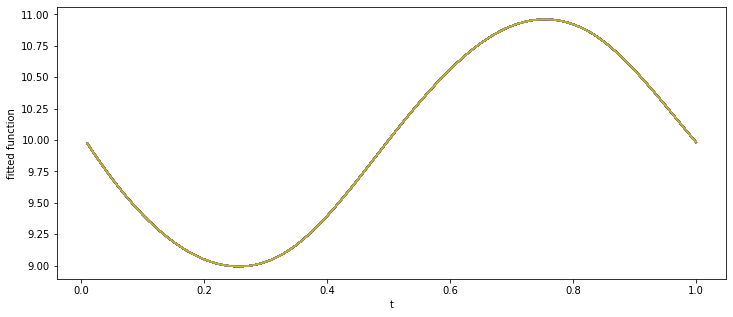

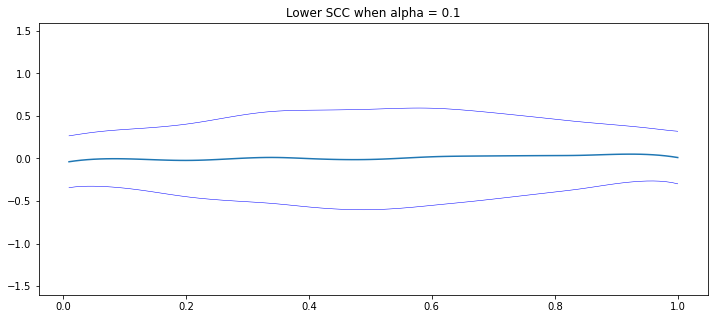

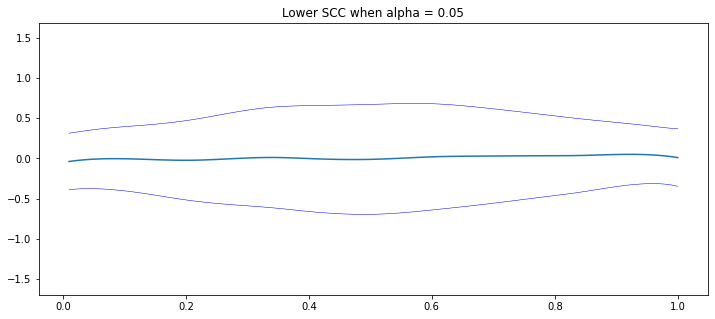

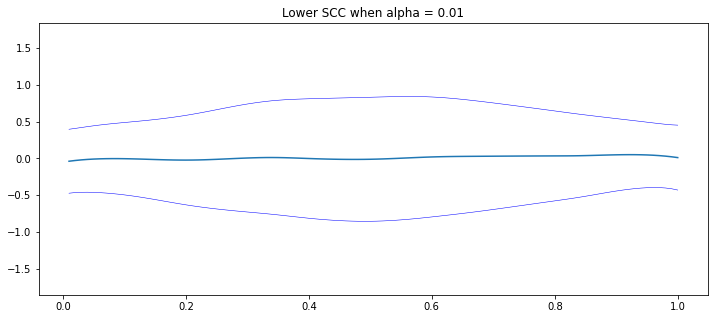

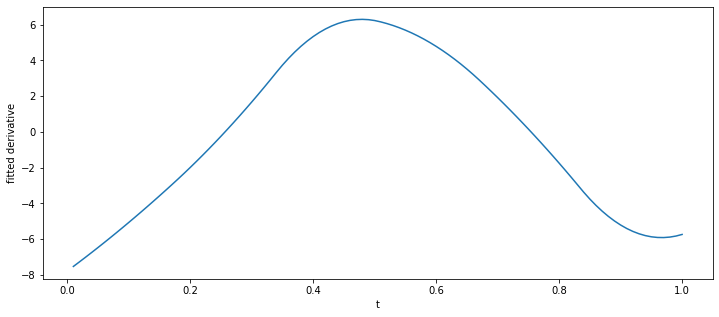

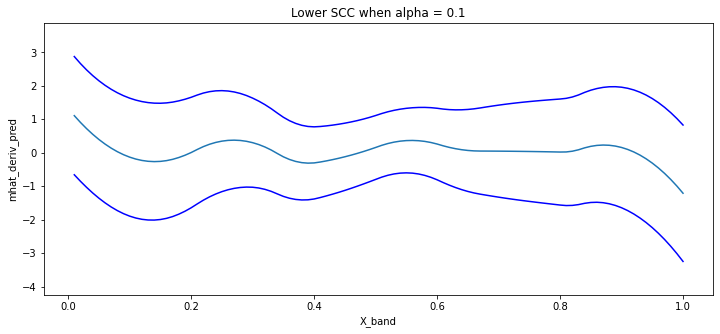

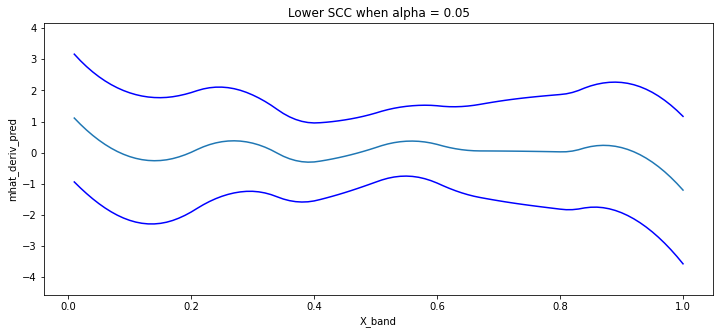

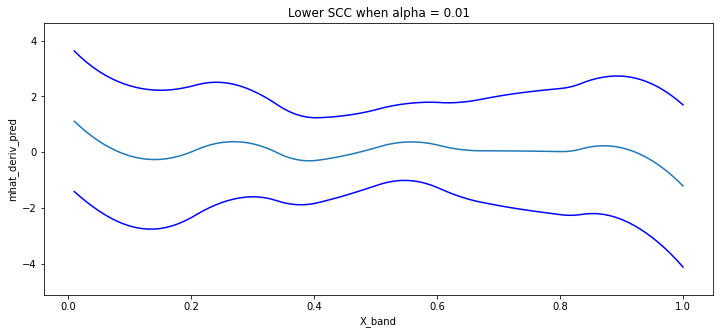

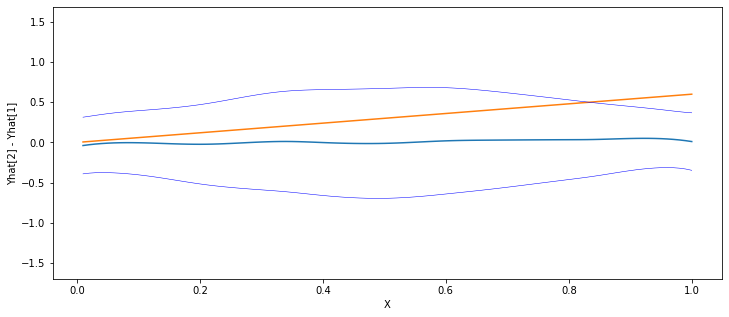

In [19]:
#example2 method results
(Yhat, Yhat_pred, Yhat_deriv, Yhat_deriv_pred, scc, scc_deriv, sce, cover_zero, bw, bw_deriv, knots_est_a, knots_est_b, 
 knots_cov_a, knots_cov_b, Ya, Yb, d_est, d_cov, derivs, alpha) = scc_1D_two_sample(Ya,
                                                                                    Yb,
                                                                                    X, 
                                                                                    X_band, 
                                                                                    generate_plots=True)

# generate plots for actual values
Yband_true = 0.6*X_band
Yband_v_true = np.repeat(0.6, len(X_band))

plt.plot(X, Yhat[1]-Yhat[0])
plt.ylim(min(scc[:,0,1])-1, max(scc[:,1,1])+1)
plt.plot(X_band, Yband_true)
plt.plot(X_band, scc[:,0,1], color='blue', linewidth=0.5)
plt.plot(X_band, scc[:,1,1], color='blue', linewidth=0.5)
plt.ylabel('Yhat[2] - Yhat[1]')
plt.xlabel('X')
plt.show()